In [208]:
# Initial imports
import pandas as pd
from pathlib import Path


In [209]:
#Load data
file = Path('crypto_data.csv')
crypto_df = pd.read_csv(file)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [210]:
 #List dataframe data types
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [211]:
trading_df = crypto_df.loc[crypto_df['IsTrading'] == True]
trading_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [212]:
#Remove the IsTrading Column
trading_df = trading_df.drop(columns=["IsTrading"])
trading_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [213]:
#Find null values
for c in trading_df.columns:
    print(f"Column {c} has {trading_df[c].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [214]:
#Drop rows where TotalCoinsMinded has null values
trading_df = trading_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [215]:
#Check null values again
for c in trading_df.columns:
    print(f"Column {c} has {trading_df[c].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [216]:
#Find duplicate entries
print(f"Duplicate entries: {trading_df.duplicated().sum()}")

Duplicate entries: 0


In [217]:
#Find only coins that have been mined > 0 times
trading_df = trading_df.loc[crypto_df['TotalCoinsMined'] > 0]
trading_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [218]:
#Drop CoinName
trading_df = trading_df.drop(columns = ["CoinName"])
trading_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [219]:
#Convert algorithm and prooftype to numeric
df = pd.get_dummies(trading_df, drop_first = True)
df.head()

,TotalCoinsMined,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,Unnamed: 0_AC3,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using pd.get_dummies() on the df created several additional columns (features) to split out the non-numeric values. These will need to be removed.

In [220]:
#Standardize/scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TotalCoinsMined']])
#df.columns


In [221]:

# Create a DataFrame with the transformed data
new_df = pd.DataFrame(scaled_data)
df["ScaledCoinsMined"] = new_df[0]
df = df.drop(columns = ["TotalCoinsMined"])
df.head()

,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,Unnamed: 0_AC3,Unnamed: 0_ACC,...,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999,ScaledCoinsMined
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.117108
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.524946
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.115726
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.116731
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.114622


In [222]:
#Drop NaN from 
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.head()


,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,Unnamed: 0_AC3,Unnamed: 0_ACC,...,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999,ScaledCoinsMined
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.117108
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.524946
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.115726
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.116731
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.114622


In [223]:
df.reset_index(drop = True)


,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,Unnamed: 0_AC3,Unnamed: 0_ACC,...,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999,ScaledCoinsMined
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.117108
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.524946
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.115726
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.116731
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.114622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.117035
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.095180
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.114915
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.591857


In [226]:
#Dimensionality reduction with PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=0.90)

#Drop target (total mined)
df2 = df.drop('ScaledCoinsMined', axis = 1)

#Get principal components from pca
df_pca_fit = pca.fit_transform(df2)

In [227]:
df_pca = pd.DataFrame(data = df_pca_fit)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.594778,0.797753,-0.356220,0.070033,-0.153024,0.002160,-0.017729,0.026090,-0.053485,-0.046475,...,-0.000826,-0.078456,-0.050123,-0.020283,0.017042,0.054529,-0.052732,-0.046769,-0.030915,0.033696
1,0.594778,0.797753,-0.356220,0.070033,-0.153024,0.002160,-0.017729,0.026090,-0.053485,-0.046475,...,-0.000826,-0.078456,-0.050123,-0.020283,0.017042,0.054529,-0.052732,-0.046769,-0.030915,0.033696
2,0.909500,-0.116946,-0.260168,0.034942,0.027703,0.636928,0.171658,-0.601566,0.376027,-0.071626,...,0.001000,0.009398,0.032209,0.034184,-0.233924,0.074433,0.066548,-0.141034,0.042584,-0.030090
3,-0.542732,-0.845290,-0.453585,0.586727,0.162865,-0.494253,0.675305,0.041211,0.053630,-0.016428,...,0.060686,-0.099618,-0.007969,0.007847,-0.024911,-0.003548,-0.044671,0.018648,-0.043638,0.020952
4,-0.396610,-0.400398,0.284409,-0.349523,0.954140,0.178637,-0.029766,0.070441,-0.283976,0.008918,...,0.044880,0.045382,0.063229,0.031495,0.051557,0.024040,0.043929,0.059123,-0.008610,0.049754


In [229]:
#Check explained variance
#pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum() #Equals 0.90054597

array([0.12946565, 0.21320759, 0.27147799, 0.31318965, 0.34689224,
       0.37124756, 0.38766242, 0.40179475, 0.41361193, 0.42440117,
       0.43478222, 0.44442597, 0.45360156, 0.46210448, 0.47036149,
       0.47806203, 0.48562927, 0.49270631, 0.49937151, 0.50583966,
       0.51171666, 0.51755536, 0.52335911, 0.52914541, 0.5349173 ,
       0.54060691, 0.54617547, 0.55135549, 0.5563848 , 0.56123459,
       0.56601472, 0.57036753, 0.57472034, 0.57907316, 0.58342597,
       0.58777878, 0.59213159, 0.5964844 , 0.6008271 , 0.60514785,
       0.60943406, 0.61365354, 0.61778336, 0.62188093, 0.62590478,
       0.6298912 , 0.63378726, 0.63756562, 0.64133967, 0.64475506,
       0.64781704, 0.65071891, 0.65362079, 0.65652266, 0.65942454,
       0.66232641, 0.66522828, 0.66813016, 0.67103203, 0.67393391,
       0.67683578, 0.67973766, 0.68263953, 0.6855414 , 0.68844328,
       0.69134515, 0.69424703, 0.6971489 , 0.70005077, 0.70295265,
       0.70585452, 0.7087564 , 0.71165827, 0.71456015, 0.71746

In [247]:
#Run t-SNE to further reduce
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate = 50)
tsne_features = tsne.fit_transform(df_pca)

In [248]:
#Check shape
tsne_features.shape

(205, 2)

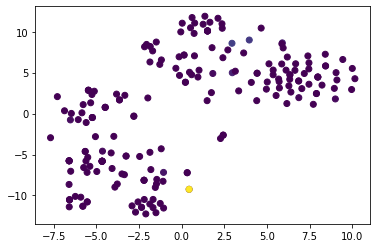

In [249]:
#Plot tsne
import matplotlib.pyplot as plt
labels = df['ScaledCoinsMined']
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

There are distinct clusters but a different learning rate may yeild better results